In [1]:
# Multivalent Linear Regression

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Defining the function for Multivalent Linear Regression

# Class MultipleLinearRegression
class MultipleLinearRegression:
    def __init__(self, X, y, degree):
        self.X = X
        self.y = y
        self.degree = degree
        self.poly = PolynomialFeatures(degree=self.degree)
        self.X_poly = self.poly.fit_transform(self.X)
        self.regressor = LinearRegression()
        self.regressor.fit(self.X_poly, self.y)
        
    def predict(self, X):
        return self.regressor.predict(self.poly.fit_transform(X))
    
    def get_coefficients(self):
        return self.regressor.coef_
    
    def get_intercept(self):
        return self.regressor.intercept_
    
    def get_score(self):
        return self.regressor.score(self.X_poly, self.y)


In [3]:
# Importing the dataset
df = pd.read_csv("../data/salary_sata.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


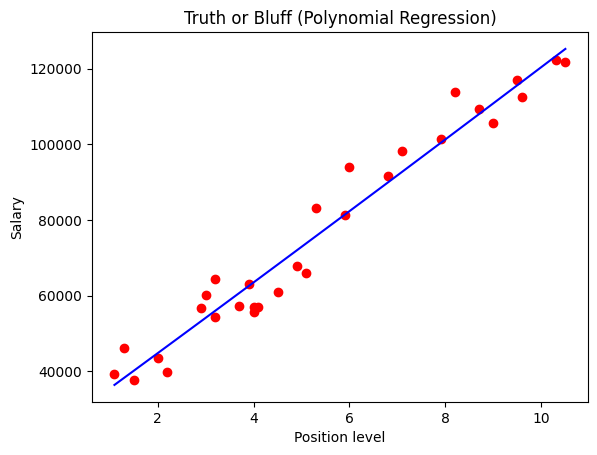

In [6]:
# Defining the dependent and independent variables
X = df.iloc[:, :-1].values # Independent variables
y = df.iloc[:, -1].values # Dependent variable

MultipleLinearRegression(X, y, 2).get_score()

# Visualising the Polynomial Regression results
def visualize_results():
    plt.scatter(X, y, color = 'red')
    plt.plot(X, MultipleLinearRegression(X, y, 2).predict(X), color = 'blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

visualize_results()